Number of detected flares: 116


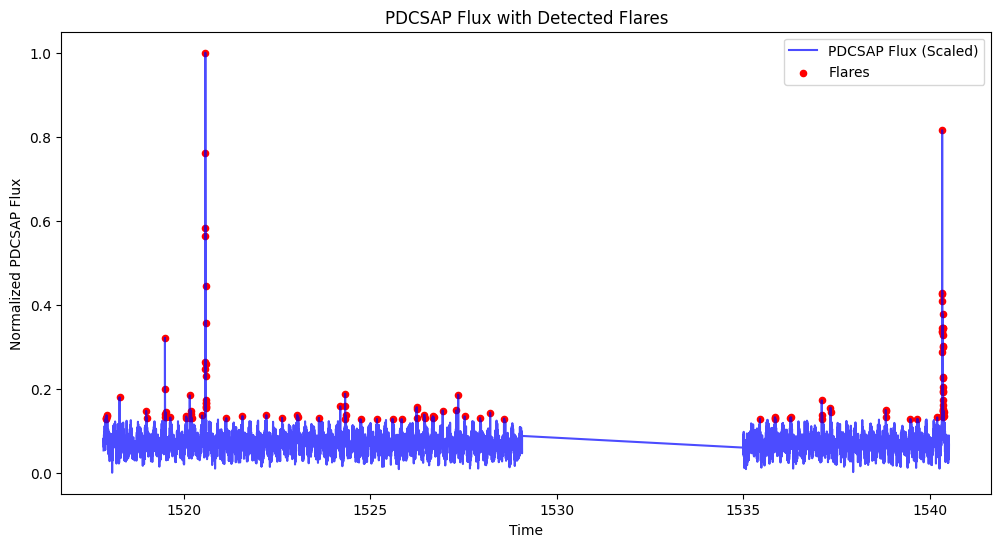

Processing complete. Cleaned file saved as 'cleaned_star_data.csv'


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/0131799991.csv'
df = pd.read_csv(file_path)

# Clean the data
# Drop irrelevant columns
df = df[['time', 'pdcsap_flux']] # Keep only the time and flux of interest

# Handle missing values (remove rows where pdcsap_flux is missing)
df = df.dropna(subset=['pdcsap_flux'])

# Standardize using Min-Max Scaler
scaler = MinMaxScaler()
df['pdcsap_flux_scaled'] = scaler.fit_transform(df[['pdcsap_flux']])

# Detect Flares using IQR Method
Q1 = df['pdcsap_flux_scaled'].quantile(0.25)
Q3 = df['pdcsap_flux_scaled'].quantile(0.75)
IQR = Q3 - Q1

# Define flare thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify flares
df['is_flare'] = (df['pdcsap_flux_scaled'] > upper_bound)

# Count the number of detected flares
num_flares = df['is_flare'].sum()
print(f"Number of detected flares: {num_flares}")

# Plot the flares
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['pdcsap_flux_scaled'], label='PDCSAP Flux (Scaled)', color='blue', alpha=0.7)
plt.scatter(df.loc[df['is_flare'], 'time'], df.loc[df['is_flare'], 'pdcsap_flux_scaled'], color='red', label='Flares', s=20)
plt.title('PDCSAP Flux with Detected Flares')
plt.xlabel('Time')
plt.ylabel('Normalized PDCSAP Flux')
plt.legend()
plt.show()

# Save Cleaned and Processed Data
df.to_csv('/content/cleaned_star_data.csv', index=False)

print("Processing complete. Cleaned file saved as 'cleaned_star_data.csv'")


Number of detected flares: 64


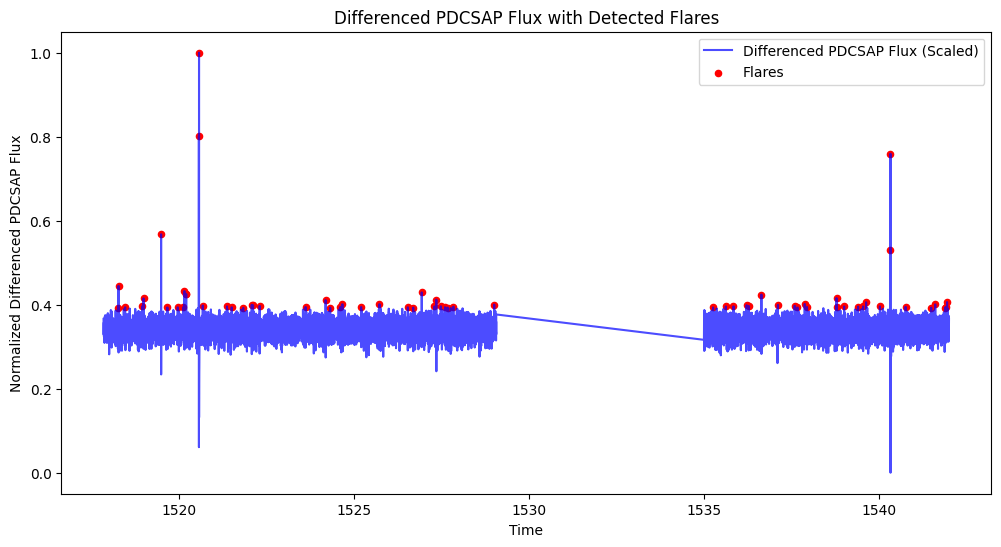

Processing complete. Cleaned file saved as 'cleaned_star_data_with_differencing.csv'


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/0131799991.csv'
df = pd.read_csv(file_path)

# Clean the data
# Keep only the 'time' and 'pdcsap_flux' columns
df = df[['time', 'pdcsap_flux']].dropna()

# Step 2: Apply First-Order Differencing
df['diff_flux'] = df['pdcsap_flux'].diff()

# Remove resulting NaN values after differencing
df = df.dropna(subset=['diff_flux'])

# Scale the Differenced Flux using Min-Max Scaler
scaler = MinMaxScaler()
df['scaled_diff_flux'] = scaler.fit_transform(df[['diff_flux']])

# Detect Flares using IQR Method
Q1 = df['scaled_diff_flux'].quantile(0.25)
Q3 = df['scaled_diff_flux'].quantile(0.75)
IQR = Q3 - Q1

# Define flare threshold based on IQR
upper_bound = Q3 + 1.5 * IQR

# Identify flares
df['is_flare'] = df['scaled_diff_flux'] > upper_bound

# Count the number of detected flares
num_flares = df['is_flare'].sum()
print(f"Number of detected flares: {num_flares}")

# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['scaled_diff_flux'], label='Differenced PDCSAP Flux (Scaled)', color='blue', alpha=0.7)
plt.scatter(df.loc[df['is_flare'], 'time'], df.loc[df['is_flare'], 'scaled_diff_flux'], color='red', label='Flares', s=20)
plt.title('Differenced PDCSAP Flux with Detected Flares')
plt.xlabel('Time')
plt.ylabel('Normalized Differenced PDCSAP Flux')
plt.legend()
plt.show()

# Save the Cleaned and Processed Data
df.to_csv('/content/cleaned_star_data_with_differencing.csv', index=False)

print("Processing complete. Cleaned file saved as 'cleaned_star_data_with_differencing.csv'")

Number of detected flares: 78


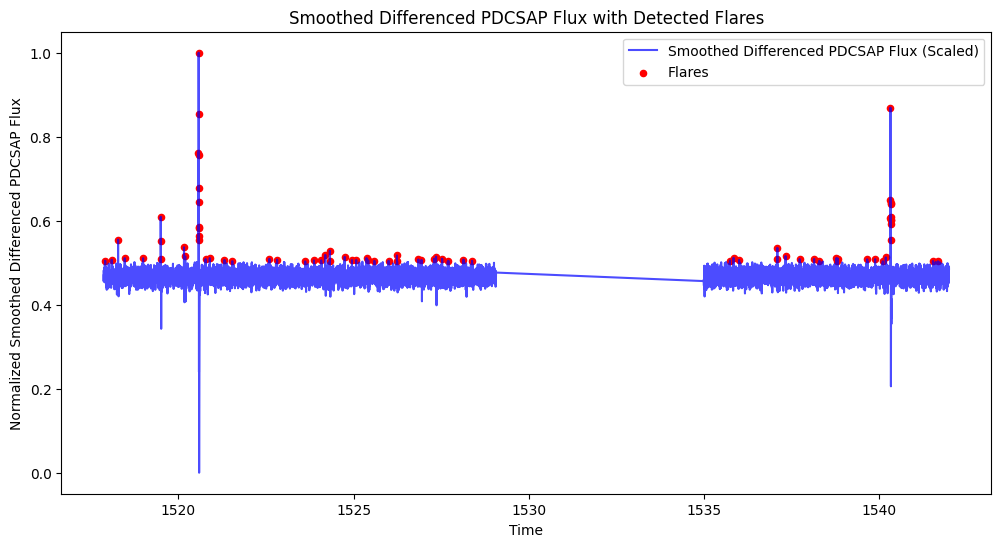

Processing complete. Cleaned file saved as 'cleaned_star_data_with_smoothing.csv'


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/0131799991.csv'
df = pd.read_csv(file_path)

# Clean the data
df = df[['time', 'pdcsap_flux']].dropna()

# Apply First-Order Differencing
df['diff_flux'] = df['pdcsap_flux'].diff()

# Remove NaNs after differencing
df = df.dropna(subset=['diff_flux'])

# Apply Rolling Mean to Smooth Noise
df['smoothed_diff_flux'] = df['diff_flux'].rolling(window=10).mean()

# Remove any NaNs after smoothing
df = df.dropna(subset=['smoothed_diff_flux'])

# Scale the Smoothed Differenced Flux using Min-Max Scaler
scaler = MinMaxScaler()
df['scaled_smoothed_diff_flux'] = scaler.fit_transform(df[['smoothed_diff_flux']])

# Detect Flares using IQR
Q1 = df['scaled_smoothed_diff_flux'].quantile(0.25)
Q3 = df['scaled_smoothed_diff_flux'].quantile(0.75)
IQR = Q3 - Q1

# Define flare threshold based on IQR
upper_bound = Q3 + 1.5 * IQR

# Identify flares
df['is_flare'] = df['scaled_smoothed_diff_flux'] > upper_bound

# Count the number of detected flares
num_flares = df['is_flare'].sum()
print(f"Number of detected flares: {num_flares}")

# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['scaled_smoothed_diff_flux'], label='Smoothed Differenced PDCSAP Flux (Scaled)', color='blue', alpha=0.7)
plt.scatter(df.loc[df['is_flare'], 'time'], df.loc[df['is_flare'], 'scaled_smoothed_diff_flux'], color='red', label='Flares', s=20)
plt.title('Smoothed Differenced PDCSAP Flux with Detected Flares')
plt.xlabel('Time')
plt.ylabel('Normalized Smoothed Differenced PDCSAP Flux')
plt.legend()
plt.show()

# Save Cleaned Data
df.to_csv('/content/cleaned_star_data_with_smoothing.csv', index=False)

print("Processing complete. Cleaned file saved as 'cleaned_star_data_with_smoothing.csv'")

Number of detected flares: 26


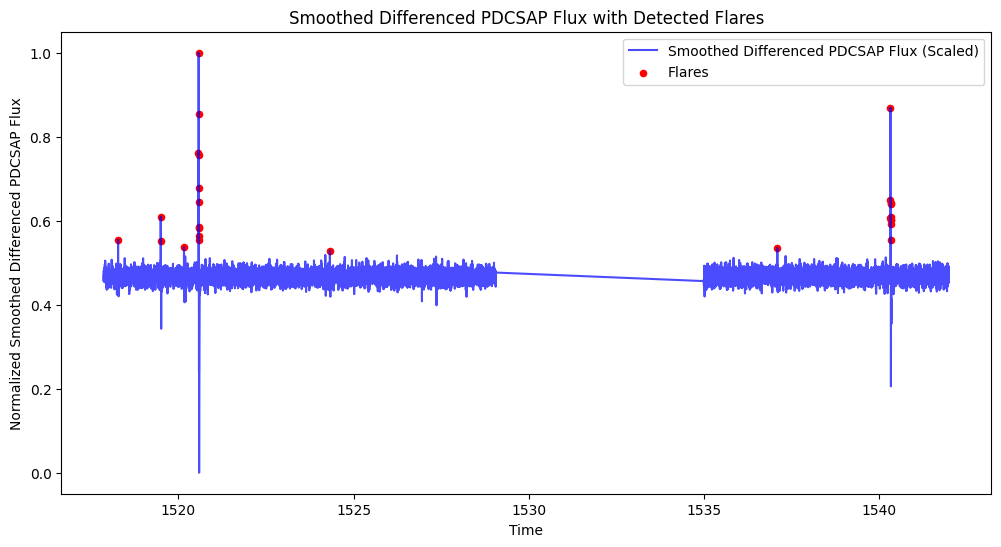

Processing complete. Cleaned file saved as 'cleaned_star_data_with_smoothing.csv'


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/0131799991.csv'
df = pd.read_csv(file_path)

# Clean the data
df = df[['time', 'pdcsap_flux']].dropna()

# Apply First-Order Differencing
df['diff_flux'] = df['pdcsap_flux'].diff()

# Remove NaNs after differencing
df = df.dropna(subset=['diff_flux'])

# Apply Rolling Mean to Smooth Noise
df['smoothed_diff_flux'] = df['diff_flux'].rolling(window=10).mean()

# Remove any NaNs after smoothing
df = df.dropna(subset=['smoothed_diff_flux'])

# Scale the Smoothed Differenced Flux using Min-Max Scaler
scaler = MinMaxScaler()
df['scaled_smoothed_diff_flux'] = scaler.fit_transform(df[['smoothed_diff_flux']])

# Detect Flares using IQR
Q1 = df['scaled_smoothed_diff_flux'].quantile(0.25)
Q3 = df['scaled_smoothed_diff_flux'].quantile(0.75)
IQR = Q3 - Q1

# Define flare threshold based on IQR
upper_bound = Q3 + 2.5 * IQR

# Identify flares
df['is_flare'] = df['scaled_smoothed_diff_flux'] > upper_bound

# Count the number of detected flares
num_flares = df['is_flare'].sum()
print(f"Number of detected flares: {num_flares}")

# Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['scaled_smoothed_diff_flux'], label='Smoothed Differenced PDCSAP Flux (Scaled)', color='blue', alpha=0.7)
plt.scatter(df.loc[df['is_flare'], 'time'], df.loc[df['is_flare'], 'scaled_smoothed_diff_flux'], color='red', label='Flares', s=20)
plt.title('Smoothed Differenced PDCSAP Flux with Detected Flares')
plt.xlabel('Time')
plt.ylabel('Normalized Smoothed Differenced PDCSAP Flux')
plt.legend()
plt.show()

# Save Cleaned Data
df.to_csv('/content/cleaned_star_data_with_smoothing.csv', index=False)

print("Processing complete. Cleaned file saved as 'cleaned_star_data_with_smoothing.csv'")


 Outlier Ratio: 0.0020 (0.20% of data)
 Distinct flare events: 7


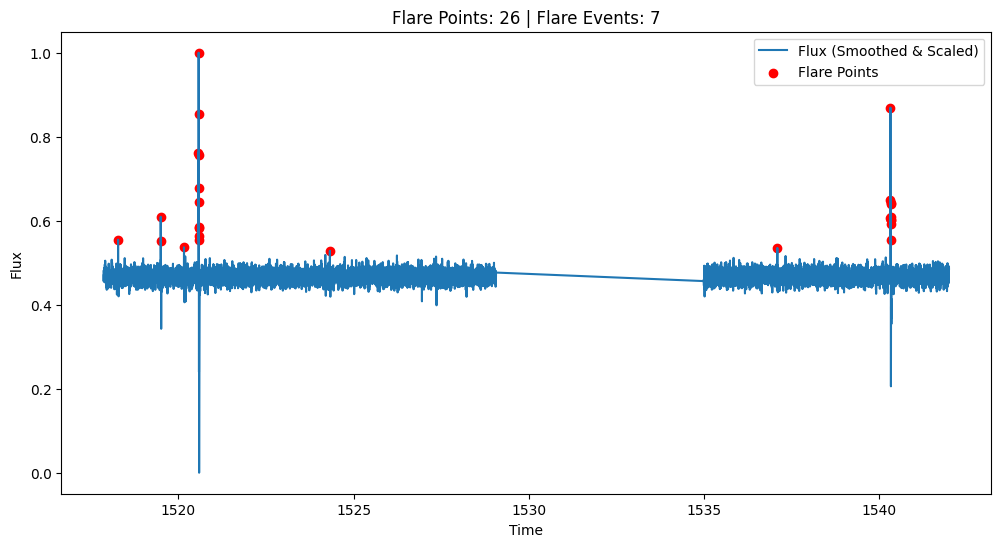

 Avg flare duration: 3.71 pts


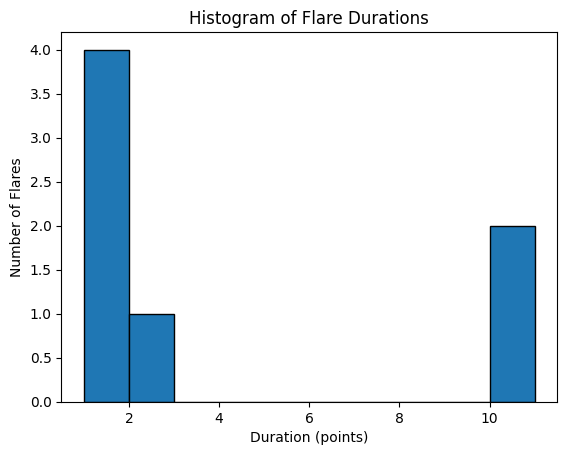

 TESS observation spans from 1517.86 to 1542.00 (BJD - 2457000)
 Total duration: 24.14 days


In [ ]:
# Evaluation: Outlier ratio
outlier_ratio = df['is_flare'].mean()
print(f"\n Outlier Ratio: {outlier_ratio:.4f} ({outlier_ratio*100:.2f}% of data)")

# Evaluation: Distinct flare events
in_flare = False
event_count = 0
for flare in df['is_flare']:
    if flare and not in_flare:
        event_count += 1
        in_flare = True
    elif not flare and in_flare:
        in_flare = False
print(f" Distinct flare events: {event_count}")

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['scaled_smoothed_diff_flux'], label='Flux (Smoothed & Scaled)')
plt.scatter(df[df['is_flare']]['time'], df[df['is_flare']]['scaled_smoothed_diff_flux'], color='red', label='Flare Points')
plt.title(f'Flare Points: {df["is_flare"].sum()} | Flare Events: {event_count}')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend()
plt.show()


# Evaluation: Flare durations
flare_durations = []
count = 0
in_flare = False
for flare in df['is_flare']:
    if flare:
        count = count + 1 if in_flare else 1
        in_flare = True
    elif in_flare:
        flare_durations.append(count)
        in_flare = False

if flare_durations:
    print(f" Avg flare duration: {np.mean(flare_durations):.2f} pts")

plt.hist(flare_durations, bins=range(1, max(flare_durations)+2), edgecolor='black')
plt.title("Histogram of Flare Durations")
plt.xlabel("Duration (points)")
plt.ylabel("Number of Flares")
plt.show()

start_day = df['time'].min()
end_day = df['time'].max()
duration_days = end_day - start_day

print(f" TESS observation spans from {start_day:.2f} to {end_day:.2f} (BJD - 2457000)")
print(f" Total duration: {duration_days:.2f} days")


